In [2]:
# Packages
import pandas as pd 
import numpy as np 
import datetime 
import matplotlib.pyplot as plt 

In [3]:
# DataFrames
df1_Cin_NKY_W = pd.read_csv('Weather_Datasets/Weather_Data-Cinci_NKY_Weather.csv')
df2_Louis_W = pd.read_csv('Weather_Datasets/Louisville_Weather_CSV.csv') 
df3_NYC_W = pd.read_csv('Weather_Datasets/New_York_Weather.csv')
df4_LA_W = pd.read_csv('Weather_Datasets/Los_Angeles_Weather.csv') 

# Set datetime
df1_Cin_NKY_W['DATE'] = pd.to_datetime(df1_Cin_NKY_W['DATE']) # Datetime() module allows the user to work with dates as objects. 
df2_Louis_W['DATE'] = pd.to_datetime(df2_Louis_W['DATE']) 
df3_NYC_W['DATE'] = pd.to_datetime(df3_NYC_W['DATE'])
df4_LA_W['DATE'] = pd.to_datetime(df4_LA_W['DATE']) 

In [4]:
df1_Cin_NKY_W.head() # The head() function by default displays the first five rows in a particular dataframe. 

,NAME,LATITUDE,LONGITUDE,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
0,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-01,1.01,0.0,58,64,52
1,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-02,0.20,0.0,41,52,28
2,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-03,0.00,0.0,27,33,21
3,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-04,0.00,0.0,29,44,21
4,"CIN/NKY INTERNATIONAL AIRPORT, KY US",39.04443,-84.67241,2022-01-05,0.00,0.0,42,47,22


In [5]:
df3_NYC_W.tail() # The tail() function by default displays the last five rows in a particular datafarame. 

,NAME,LATITUDE,LONGITUDE,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
360,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-27,0.00,0.0,30,35,28
361,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-28,0.00,0.0,36,45,27
362,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-29,0.00,0.0,39,46,32
363,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-30,0.00,0.0,42,51,34
364,"JFK INT AIRPORT, NY US",40.63915,-73.7639,2022-12-31,0.27,0.0,46,51,41


In [56]:
#Undersdanding Cinci/NKY Data 
C_NKY_column_list = df1_Cin_NKY_W.columns # The columns function returns the label in each dataframe.
print(C_NKY_column_list) 
C_NKY_data_types = df1_Cin_NKY_W.dtypes # The dtypes function describes aspects of the data.
print(C_NKY_data_types) 
C_NKY_shape = df1_Cin_NKY_W.shape # The shape function lets the user know the number of rows and columns in the dataframe
print(C_NKY_shape) 

Index(['LOCATION', 'DATE', 'PRECIPITATION', 'SNOW', 'AVERAGE', 'HIGH', 'LOW'], dtype='object')
LOCATION                 object
DATE             datetime64[ns]
PRECIPITATION           float64
SNOW                    float64
AVERAGE                   int64
HIGH                      int64
LOW                       int64
dtype: object
(365, 7)


In [7]:
# Renaming Cincinnati/Northern KY Columns 
df1_Cin_NKY_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True)  
# The rename function is used to alter the name of a colum in each dataset.
# The inplace = True argument makes changes permanent.  


# Deleting Columns for Cincinnati/Northern KY dataframe
df1_Cin_NKY_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) # The drop() function removes rows or colums by specifing label names.

In [8]:
# Calculations for Cincinnati/Northern Ky
Cin_NKY_monthly_mean = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean() 
# The mean() function is used to calulate the mean (average) for the 'HIGH', 'LOW', and 'AVERAGE' columns.

Cin_NKY_monthly_max = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['HIGH']].max()
# The max() function returns the highest value for each of the 'HIGH', 'LOW', and 'AVERAGE' columns.

Cin_NKY_monthly_min = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['LOW']].min()
# The min() function returns the lowest value for each of the 'HIGH', 'LOW', and 'AVERAGE' columns.

Cin_NKY_monthly_sum = df1_Cin_NKY_W.groupby(df1_Cin_NKY_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum()
# The sum() functions adds the values for each of the 'HIGH', 'LOW', and 'AVERAGE' columns.

In [9]:
df1_Cin_NKY_W.head(7) 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-01,1.01,0.0,58,64,52
1,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-02,0.20,0.0,41,52,28
2,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-03,0.00,0.0,27,33,21
3,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-04,0.00,0.0,29,44,21
4,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-05,0.00,0.0,42,47,22
5,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-06,0.05,0.7,21,23,16
6,"CIN/NKY INTERNATIONAL AIRPORT, KY US",2022-01-07,0.00,0.0,15,17,11


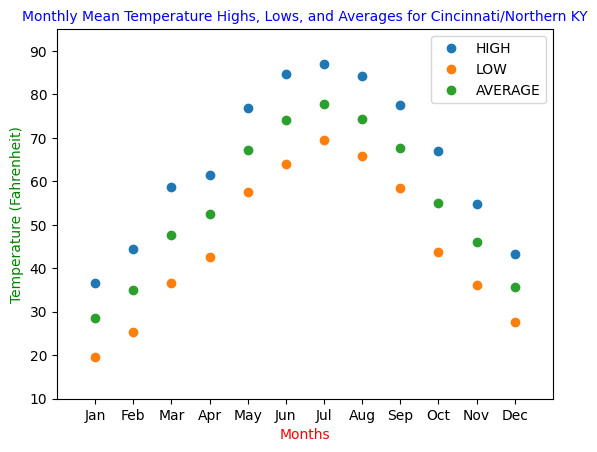

,HIGH,LOW,AVERAGE
DATE,,,
1,36.65,19.68,28.55
2,44.39,25.32,35.00
3,58.74,36.65,47.55
4,61.53,42.70,52.47
5,76.90,57.52,67.26
6,84.63,63.90,74.17
7,86.90,69.42,77.87
8,84.16,65.94,74.42
9,77.57,58.57,67.67


In [67]:
# Data Analysis for Cincinnati/Northern KY

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.plot(months, Cin_NKY_monthly_mean, 'o')    
plt.xlabel('Months', fontsize=10, color='r')
plt.ylabel('Temperature (Fahrenheit)', fontsize=10, color='g')  
plt.title('Monthly Mean Temperature Highs, Lows, and Averages for Cincinnati/Northern KY', fontsize=10, color='b')   
plt.legend(Cin_NKY_monthly_mean) 
plt.axis([-1, 12, 10, 95]) 

plt.show() 
Cin_NKY_monthly_mean.round(2) 

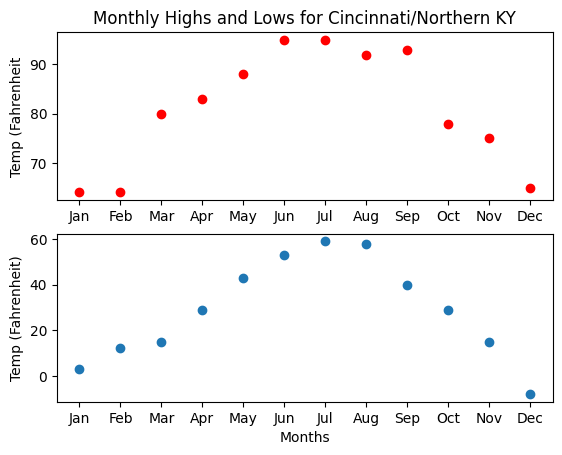

In [142]:
# Plot 1
months_short = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

x = months_short
y = Cin_NKY_monthly_max
plt.subplot(2, 1, 1,)  
plt.plot(x, y, 'o', color='r') 
plt.title('Monthly Highs and Lows for Cincinnati/Northern KY')
#plt.xlabel('Months') 
plt.ylabel('Temp (Fahrenheit')

# Plot 2
x = months_short
y = Cin_NKY_monthly_min
plt.subplot(2, 1, 2)
plt.plot(x, y, 'o')  
#plt.title('Lows for Cin/NKY') 
plt.xlabel('Months')
plt.ylabel('Temp (Fahrenheit)')

plt.show() 

In [136]:
Cin_NKY_monthly_max

,HIGH
DATE,
1,64
2,64
3,80
4,83
5,88
6,95
7,95
8,92
9,93


In [134]:
Cin_NKY_monthly_min

,LOW
DATE,
1,3
2,12
3,15
4,29
5,43
6,53
7,59
8,58
9,40


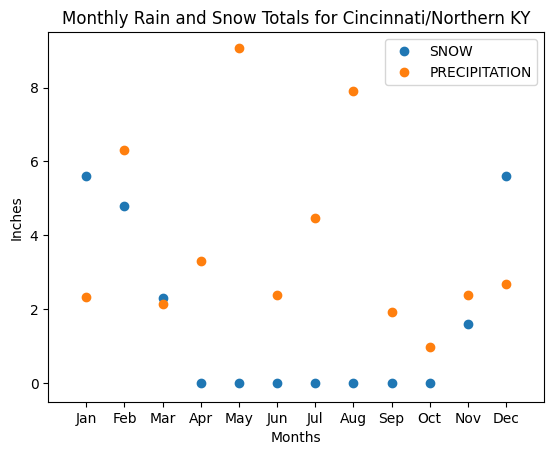

,SNOW,PRECIPITATION
DATE,,
1,5.6,2.34
2,4.8,6.30
3,2.3,2.14
4,0.0,3.30
5,0.0,9.08
6,0.0,2.38
7,0.0,4.48
8,0.0,7.91
9,0.0,1.94


In [96]:
plt.plot(months, Cin_NKY_monthly_sum,'o') 
plt.xlabel('Months')
plt.ylabel('Inches') 
plt.title('Monthly Rain and Snow Totals for Cincinnati/Northern KY')
plt.legend(Cin_NKY_monthly_sum)
plt.axis([-1,12, -0.5,9.5])
plt.show() 
Cin_NKY_monthly_sum

In [59]:
#Understanding Louisville Data
Loui_column_list = df2_Louis_W.columns
print(Loui_column_list) 
Loui_data_types = df2_Louis_W.dtypes
print(Loui_data_types) 
Loui_shape = df2_Louis_W.shape
print(Loui_shape) 

Index(['LOCATION', 'DATE', 'PRECIPITATION', 'SNOW', 'AVERAGE', 'HIGH', 'LOW'], dtype='object')
LOCATION                 object
DATE             datetime64[ns]
PRECIPITATION           float64
SNOW                    float64
AVERAGE                   int64
HIGH                      int64
LOW                       int64
dtype: object
(365, 7)


In [13]:
#Renaming Louisville Columns
df2_Louis_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True)

# Deleting Columns for the Louisville dataframe
df2_Louis_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) 

In [69]:
# Calculations for Louisville Ky
Loui_monthly_mean = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean()  
Loui_monthly_max = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['HIGH']].max()
Loui_monthly_min = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['LOW']].min() 
Loui_monthly_sum = df2_Louis_W.groupby(df2_Louis_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum() 

In [60]:
df2_Louis_W.head(7) 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"LOUISVILLE INT AIRPORT, KY US",2022-01-01,2.08,0.0,61,64,55
1,"LOUISVILLE INT AIRPORT, KY US",2022-01-02,0.01,0.0,46,57,31
2,"LOUISVILLE INT AIRPORT, KY US",2022-01-03,0.00,0.0,31,37,25
3,"LOUISVILLE INT AIRPORT, KY US",2022-01-04,0.00,0.0,32,46,24
4,"LOUISVILLE INT AIRPORT, KY US",2022-01-05,0.00,0.0,46,50,30
5,"LOUISVILLE INT AIRPORT, KY US",2022-01-06,0.21,2.3,26,30,15
6,"LOUISVILLE INT AIRPORT, KY US",2022-01-07,0.00,0.0,16,22,11


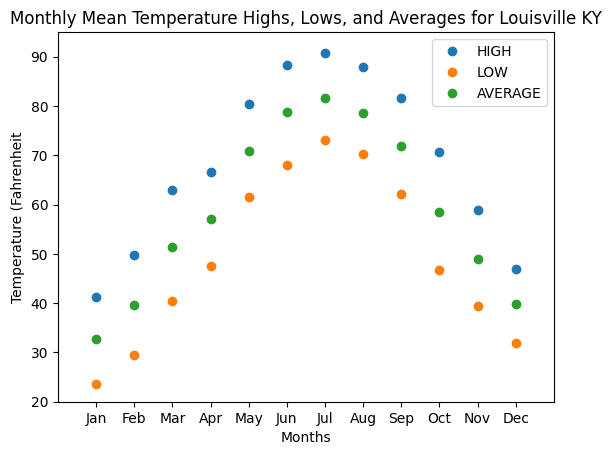

,HIGH,LOW,AVERAGE
DATE,,,
1,41.29,23.65,32.77
2,49.79,29.39,39.71
3,62.97,40.52,51.45
4,66.57,47.63,57.07
5,80.32,61.45,70.87
6,88.30,68.13,78.73
7,90.74,73.16,81.71
8,87.90,70.23,78.55
9,81.70,62.23,71.83


In [65]:
# Data Analysis for Louisville KY

plt.plot(months, Loui_monthly_mean, 'o')
plt.xlabel('Months')
plt.ylabel('Temperature (Fahrenheit')
plt.title('Monthly Mean Temperature Highs, Lows, and Averages for Louisville KY')
plt.legend(Loui_monthly_mean)
plt.axis([-1,12, 20,95])

plt.show() 
Loui_monthly_mean.round(2) 

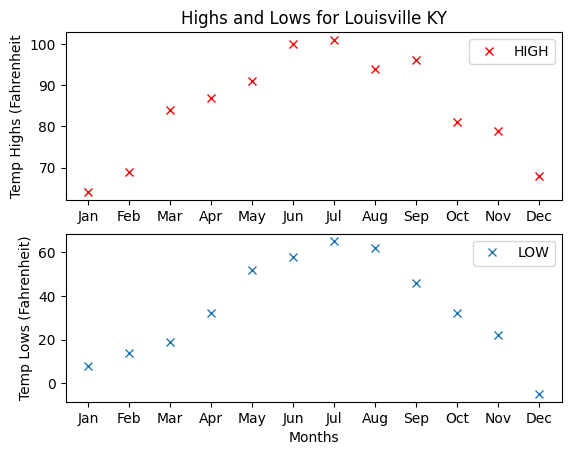

In [150]:
# Plot 1
x = months
y = Loui_monthly_max
plt.subplot(2, 1, 1,)  
plt.plot(x, y, 'x', color='r') 
plt.title('Highs and Lows for Louisville KY')
#plt.xlabel('Months') 
plt.legend(Loui_monthly_max)
plt.ylabel('Temp Highs (Fahrenheit')

# Plot 2
x = months
y = Loui_monthly_min
plt.subplot(2, 1, 2)
plt.plot(x, y, 'x')  
plt.xlabel('Months')
plt.ylabel('Temp Lows (Fahrenheit)')
plt.legend(Loui_monthly_min)

plt.show() 

In [144]:
Loui_monthly_max

,HIGH
DATE,
1,64
2,69
3,84
4,87
5,91
6,100
7,101
8,94
9,96


In [146]:
Loui_monthly_min

,LOW
DATE,
1,8
2,14
3,19
4,32
5,52
6,58
7,65
8,62
9,46


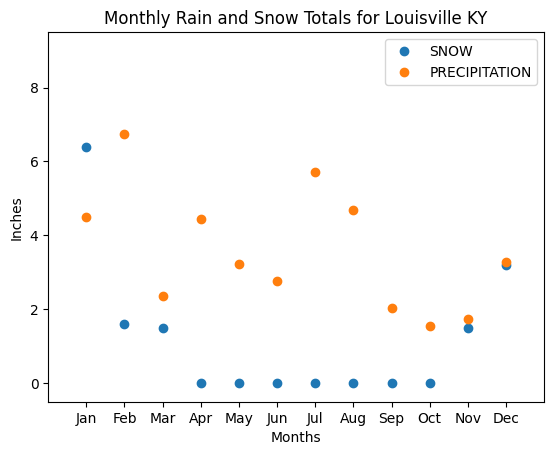

,SNOW,PRECIPITATION
DATE,,
1,6.4,4.49
2,1.6,6.74
3,1.5,2.37
4,0.0,4.44
5,0.0,3.23
6,0.0,2.77
7,0.0,5.71
8,0.0,4.69
9,0.0,2.04


In [80]:
plt.plot(months, Loui_monthly_sum,'o') 
plt.xlabel('Months')
plt.ylabel('Inches') 
plt.title('Monthly Rain and Snow Totals for Louisville KY')
plt.legend(Loui_monthly_sum)
plt.axis([-1,12, -0.5,9.5])
plt.show() 

Loui_monthly_sum

In [147]:
# Understanding New York City Data
NYC_column_list = df3_NYC_W.columns
print(NYC_column_list) 
NYC_data_types = df3_NYC_W.dtypes
print(NYC_data_types) 
NYC_shape = df3_NYC_W.shape
print(Loui_shape) 

Index(['LOCATION', 'DATE', 'PRECIPITATION', 'SNOW', 'AVERAGE', 'HIGH', 'LOW'], dtype='object')
LOCATION                 object
DATE             datetime64[ns]
PRECIPITATION           float64
SNOW                    float64
AVERAGE                   int64
HIGH                      int64
LOW                       int64
dtype: object
(365, 7)


In [15]:
#Renaming New York City Columns
df3_NYC_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True)  

#Deleting Columns for the New York City dataframe
df3_NYC_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) 

In [153]:
# Calculations for New York City
NYC_monthly_mean = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean() 
NYC_monthly_max = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['HIGH']].max() 
NYC_monthly_min = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['LOW']].min() 
NYC_monthly_sum = df3_NYC_W.groupby(df3_NYC_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum() 

In [149]:
df3_NYC_W.head(6) 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"JFK INT AIRPORT, NY US",2022-01-01,1.22,0.0,50,53,48
1,"JFK INT AIRPORT, NY US",2022-01-02,0.03,0.0,53,59,38
2,"JFK INT AIRPORT, NY US",2022-01-03,0.00,0.0,34,39,22
3,"JFK INT AIRPORT, NY US",2022-01-04,0.00,0.0,25,33,19
4,"JFK INT AIRPORT, NY US",2022-01-05,0.29,0.0,36,46,30
5,"JFK INT AIRPORT, NY US",2022-01-06,0.00,0.0,39,41,34


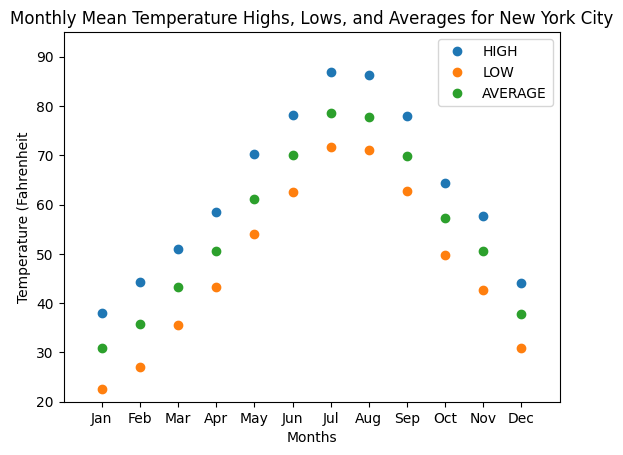

,HIGH,LOW,AVERAGE
DATE,,,
1,38.03,22.58,30.97
2,44.21,27.04,35.75
3,51.06,35.61,43.35
4,58.53,43.37,50.60
5,70.35,54.13,61.23
6,78.10,62.47,70.07
7,86.94,71.65,78.52
8,86.35,71.03,77.68
9,77.97,62.70,69.87


In [151]:
plt.plot(months, NYC_monthly_mean, 'o')
plt.xlabel('Months')
plt.ylabel('Temperature (Fahrenheit')
plt.title('Monthly Mean Temperature Highs, Lows, and Averages for New York City')
plt.legend(NYC_monthly_mean)
plt.axis([-1,12, 20,95])

plt.show() 
NYC_monthly_mean.round(2)  

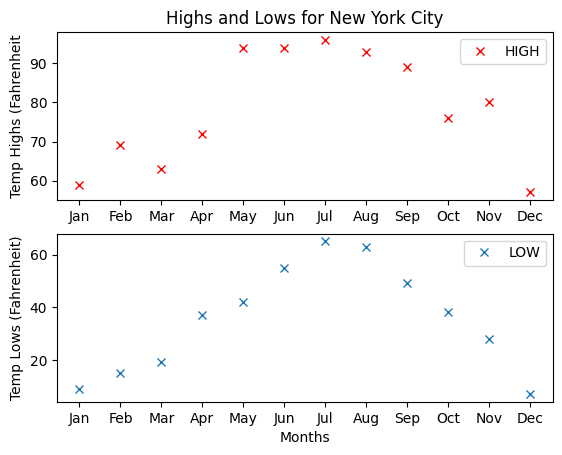

In [154]:
# Plot 1
x = months
y = NYC_monthly_max
plt.subplot(2, 1, 1,)  
plt.plot(x, y, 'x', color='r') 
plt.title('Highs and Lows for New York City')
#plt.xlabel('Months') 
plt.legend(NYC_monthly_max)
plt.ylabel('Temp Highs (Fahrenheit')

# Plot 2
x = months
y = NYC_monthly_min
plt.subplot(2, 1, 2)
plt.plot(x, y, 'x')  
plt.xlabel('Months')
plt.ylabel('Temp Lows (Fahrenheit)')
plt.legend(NYC_monthly_min) 

plt.show() 

In [155]:
NYC_monthly_max

,HIGH
DATE,
1,59
2,69
3,63
4,72
5,94
6,94
7,96
8,93
9,89


In [156]:
NYC_monthly_min

,LOW
DATE,
1,9
2,15
3,19
4,37
5,42
6,55
7,65
8,63
9,49


In [17]:
# Deleting Columns for the Los Angeles dataframe 
df4_LA_W.drop(columns = ['LATITUDE', 'LONGITUDE'], inplace = True) 

In [18]:
df4_LA_W.head() 

,NAME,DATE,PRCP,SNOW,TAVG,TMAX,TMIN
0,"LAX AIRPORT, CA US",2022-01-01,0.0,NaN,55,61,49
1,"LAX AIRPORT, CA US",2022-01-02,0.0,NaN,54,66,45
2,"LAX AIRPORT, CA US",2022-01-03,0.0,NaN,53,60,44
3,"LAX AIRPORT, CA US",2022-01-04,0.0,NaN,52,60,44
4,"LAX AIRPORT, CA US",2022-01-05,0.0,NaN,54,65,45


In [19]:

# Renaming Los Angeles Columns 
df4_LA_W.rename(columns = {'NAME': 'LOCATION', 'TMIN': 'LOW', 'TMAX': 'HIGH', 'PRCP': 'PRECIPITATION', 'TAVG': 'AVERAGE'}, inplace = True) 

# Calculations for Los Angeles
LA_monthly_mean = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].mean() 
LA_monthly_max = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].max() 
LA_monthly_min = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['HIGH', 'LOW', 'AVERAGE']].min() 
LA_monthly_sum = df4_LA_W.groupby(df4_LA_W.DATE.dt.month)[['SNOW', 'PRECIPITATION']].sum() 

LA_monthly_sum.round(1) # The round() function is used to return a floating number to a specified number of decimals. 

,SNOW,PRECIPITATION
DATE,,
1,0.0,0.1
2,0.0,0.0
3,0.0,1.1
4,0.0,0.2
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.1


In [20]:
# Replacing NaN with 0 in LA dataframe
df4_LA_W['SNOW'] = df4_LA_W['SNOW'].fillna(0) # The fillna() function is used to fill NaN value with a specified value, in this case with a 0. 

In [21]:
df4_LA_W.head() 

,LOCATION,DATE,PRECIPITATION,SNOW,AVERAGE,HIGH,LOW
0,"LAX AIRPORT, CA US",2022-01-01,0.0,0.0,55,61,49
1,"LAX AIRPORT, CA US",2022-01-02,0.0,0.0,54,66,45
2,"LAX AIRPORT, CA US",2022-01-03,0.0,0.0,53,60,44
3,"LAX AIRPORT, CA US",2022-01-04,0.0,0.0,52,60,44
4,"LAX AIRPORT, CA US",2022-01-05,0.0,0.0,54,65,45
